<a href="https://colab.research.google.com/github/HossamMostafaElSayed/NTI_Training/blob/main/Fashion_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print("\nShape of training images:", train_images.shape)


Shape of training images: (60000, 28, 28)


In [8]:
print("Number of training labels:", len(train_labels))

Number of training labels: 60000


In [9]:
print("Training labels:", train_labels)

Training labels: [9 0 0 ... 3 0 5]


In [10]:
print("\nShape of test images:", test_images.shape)


Shape of test images: (10000, 28, 28)


In [11]:
print("Number of test labels:", len(test_labels))

Number of test labels: 10000


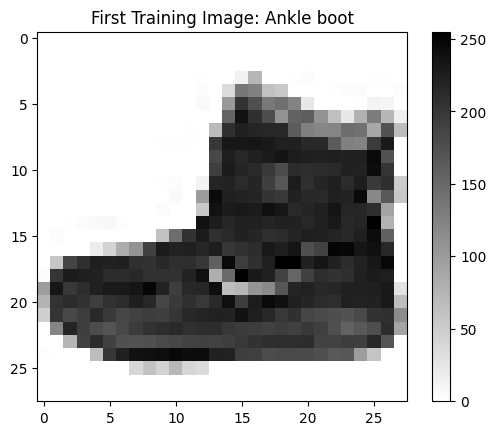

In [12]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title(f"First Training Image: {class_names[train_labels[0]]}")
plt.show()


In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

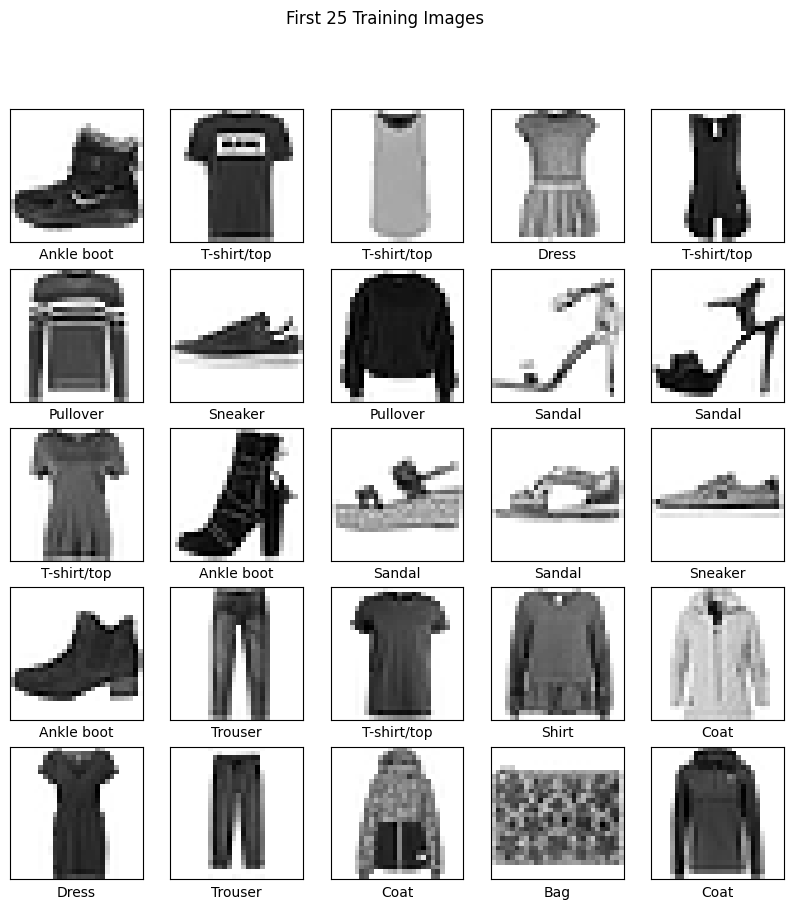

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("First 25 Training Images")
plt.show()


In [15]:
model = keras.Sequential([
    # This layer flattens the 2D array of the image (28x28 pixels)
    # into a 1D array of 784 pixels. It has no parameters to learn;
    # it only reformats the data.
    keras.layers.Flatten(input_shape=(28, 28)),

    # This is a densely-connected, or fully-connected, neural layer.
    # It has 128 nodes (or neurons). The 'relu' activation function
    # introduces non-linearity, allowing the model to learn complex patterns.
    keras.layers.Dense(128, activation='relu'),

    # This is the output layer. It has 10 nodes, one for each class.
    # The 'softmax' activation function calculates a probability distribution
    # for the 10 classes, so the output values sum to 1.
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(
    # Optimizer: This is how the model is updated based on the data it sees
    # and its loss function. 'adam' is a popular and effective optimizer.
    optimizer='adam',

    # Loss function: This measures how accurate the model is during training.
    # We want to minimize this function. 'sparse_categorical_crossentropy'
    # is used for multi-class classification problems where labels are integers.
    loss='sparse_categorical_crossentropy',

    # Metrics: Used to monitor the training and testing steps.
    # 'accuracy' calculates the percentage of images that are correctly classified.
    metrics=['accuracy']
)

# You can view all the layers of the model using the summary method.
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("\n--- Starting Model Training ---")
history = model.fit(
    train_images,
    train_labels,
    epochs=10,  # An epoch is one full pass through the entire training dataset.
    validation_data=(test_images, test_labels) # Evaluate on test data at the end of each epoch.
)
print("--- Model Training Finished ---")


--- Starting Model Training ---
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7719 - loss: 0.6472 - val_accuracy: 0.8481 - val_loss: 0.4263
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8646 - loss: 0.3788 - val_accuracy: 0.8459 - val_loss: 0.4309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8795 - loss: 0.3362 - val_accuracy: 0.8530 - val_loss: 0.4024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8846 - loss: 0.3161 - val_accuracy: 0.8730 - val_loss: 0.3546
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8901 - loss: 0.2979 - val_accuracy: 0.8628 - val_loss: 0.3747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8951 - loss: 0.2854 - val_accuracy: 0.8686 - val_loss: 0.3586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8993 - loss: 0.2717 - val_accuracy: 0.8778 - val_loss: 0.3408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - 

In [18]:
print("\n--- Evaluating Model on Test Data ---")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


--- Evaluating Model on Test Data ---
313/313 - 1s - 2ms/step - accuracy: 0.8707 - loss: 0.3555

Test accuracy: 0.8707
Test loss: 0.3555


In [20]:
# With the model trained, we can use it to make predictions about some images.
predictions = model.predict(test_images)

# The model's output is an array of 10 numbers. They represent the model's
# "confidence" that the image corresponds to each of the 10 different
# articles of clothing. We can see which label has the highest confidence value.
print("\nPrediction for the first test image:", np.argmax(predictions[0]))
print("Actual label for the first test image:", test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Prediction for the first test image: 9
Actual label for the first test image: 9


In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",
             color=color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

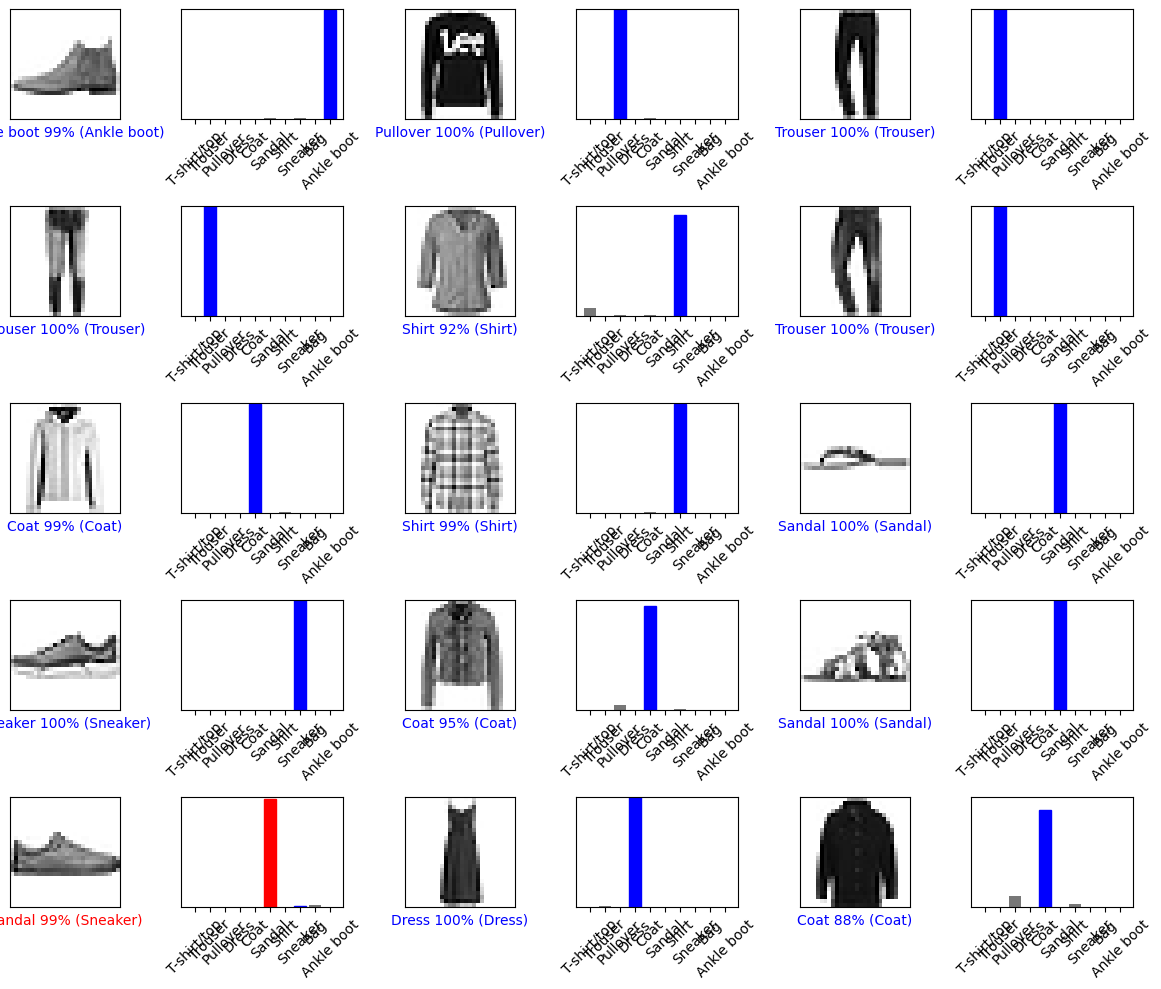

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()